# Data Visualization

In this notebook we will explore a dataset called "happyDB," which contains sentence describing what makes people happy. We will learn how to manipulate data with Python and visualize the data with different plots. To get started, run the next two cells to download the required data and libraries.

In [3]:
!wget https://raw.githubusercontent.com/dangeng/AI4ALL_NLP/main/lib.py
!mkdir data
!wget -O data/cleaned_hm.csv https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/cleaned_hm.csv
!wget -O data/demographic.csv https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/demographic.csv

--2021-07-22 15:41:51--  https://raw.githubusercontent.com/dangeng/AI4ALL_NLP/main/lib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4003 (3.9K) [text/plain]
Saving to: ‘lib.py.1’

lib.py.1            100%[===================>]   3.91K  --.-KB/s    in 0s      

2021-07-22 15:41:51 (64.6 MB/s) - ‘lib.py.1’ saved [4003/4003]

mkdir: cannot create directory ‘data’: File exists
--2021-07-22 15:41:52--  https://raw.githubusercontent.com/megagonlabs/HappyDB/master/happydb/data/cleaned_hm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [4]:
%load_ext autoreload
%autoreload 2
import lib
from collections import Counter
import numpy as np

## Using Lib
In addition to outside libraries, we have provided a library called `lib` with a few functions we have defined. It will be useful to load data, and for some visualizations. 

# Loading the Data and Checking Demographics
We have two data files: demographic.csv and cleaned_hm.csv.

* demographic.csv contains demogrpahic information about the individuals who are represented in the dataset  
  The dataset can be loaded as a list of dictionaries by calling `lib.load_demographics()`. The keys are the columns of the table: `wid`, `age`,	`country`,	`gender`,	`marital`, and	`parenthood`

* cleaned_hm.csv contains 100,000 crowd-sourced happy moments. Worker IDs listed correspond to `wid` in demographic.csv.  
  The dataset can be loaded as a list of dictionaries by calling `lib.load_happy_moments()`.The keys are the columns of the table: 	`hmid`,	`wid`,	`reflection_period`,	`original_hm`,	`cleaned_hm`,	`modified`,	`num_sentence`,	`ground_truth_category`,	`predicted_category`
  
You may find `lib.load_joined_data()` to be particularly useful, as it will load all of the data you will need without you needing to combine the two tables together! The format is a list of dictionaries. The keys are the "core" keys from the other tables that you will use later on: `cleaned_hm`, `age`, `country`, `wid`, `gender`, `parenthood`, `marital`, and `hmid`.
  
We will load the data files here using the pandas library so that you can see what each file looks like; however, you aren't expected to learn how to work with pandas, so we provide functions to load the data as a dictionary

In [5]:
lib.view_demographics()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y
5,6,35,IND,m,married,y
6,7,34,USA,m,married,y
7,8,29,VNM,m,single,n
8,9,61,USA,f,married,y
9,10,27,USA,m,single,n


In [6]:
lib.view_happy_moments()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection
5,27678,45,24h,I meditated last night.,I meditated last night.,True,1,leisure,leisure
6,27679,195,24h,"I made a new recipe for peasant bread, and it ...","I made a new recipe for peasant bread, and it ...",True,1,NaN,achievement
7,27680,740,24h,I got gift from my elder brother which was rea...,I got gift from my elder brother which was rea...,True,1,NaN,affection
8,27681,3,24h,YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED,YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED,True,1,NaN,enjoy_the_moment
9,27682,4833,24h,Watching cupcake wars with my three teen children,Watching cupcake wars with my three teen children,True,1,NaN,affection


Right now, we will only be working with the demographics file. Load it with the function that is mentioned above.

In [7]:
demographics = lib.load_joined_data()

## Aggregating Demographic Information
This data was crowdsourced, and demographic information was collected about worker's ages, countries, genders, marital status, and parenthood. To better understand the dataset, fill in the function called `get_distribution` to calculate the distribution of workers in each category for a certain property.

Hint (highlight text to see):<font color='white'>count each value, then calculate a percentage afterwards</font>

In [8]:
def get_distribution(demographics, worker_property):
    distribution = {}
    for data in demographics:
      prop = data[worker_property]

      # If the key is already in the dictionary, we can just
      # increment it by one. If it isn't, we need to
      # create a new key and set it to 1
      if prop in distribution:
        distribution[prop] += 1
      else:
        distribution[prop] = 1

    # We need to divide by the total to get a percentage
    for key in distribution:
      distribution[key] = distribution[key] / float(len(demographics))

    # return a dictionary that maps a property to a percent
    return distribution

After writing your function, run the cell below to save each distribution. Add calls to save all of the distributions!

In [9]:
age_distribution = get_distribution(demographics, 'age')
# save country, gender, and marital distributions too!
# YOUR CODE HERE!!
country_distribution = get_distribution(demographics, 'country')
gender_distribution = get_distribution(demographics, 'gender')
marital_distribution = get_distribution(demographics, 'marital')


Now, print out the distributions for marital status, country, and age. You can pass your dictionary to the function `lib.print_as_table` to print a table containing the distribution for better readability. The function takes two arguments: the dictionary and the title for the table. For example, to call it for age, you could write:

`lib.print_as_table(age_distribution, 'Age Distribution')`

In [10]:
# print out distributions here!
lib.print_as_table(age_distribution, 'Age Distribution')
lib.print_as_table(marital_distribution, 'Marital Distribution')
lib.print_as_table(country_distribution, 'Country Distribution')

Age Distribution


Property,Percent
29,0.0426916
26,0.0395285
27,0.0378376
25,0.0375093
30,0.0368329
28,0.036644
31,0.0303377
24,0.0288556
32,0.0281395
23,0.0280499


Marital Distribution


Property,Percent
single,0.538181
married,0.41123
divorced,0.0378276
separated,0.00645546
widowed,0.00474462
nan,0.00156165


Country Distribution


Property,Percent
USA,0.786423
IND,0.1664
VEN,0.00584871
CAN,0.00552047
GBR,0.00362063
PHL,0.00277515
nan,0.0020192
MEX,0.00149202
VNM,0.00125329
BRA,0.00122345


If you wrote a fairly simple function to create your dictionary, you may notice some issues with these tables that make them less informative than we would like:
1. There are a lot of ages! Furthermore, some are represented as floats and some are ints, but 25 and 25.0 should mean the same thing!
1. There are also a lot of countries, but only two of them (USA and India) are very prevalent.
1. There are some _weird_ unwanted values like nan (not a number, which means that this was not filled in in the table) and "prefer not to say" for age.

To solve these problems, we will write three more functions:
1. `get_age_distribution`  
   This function will get the distribution of ages using a range instead of using single ages. You can use the buckets 10–20, 20–30, ..., 80-90. If you come across a value that does not fit in one of the ranges, skip it!
2. `get_country_distribution`  
   This function will get the distribution of countries, but will group together all countries with less than .4% of the overall workers into one group that you should call "OTHER". You should exclude nan values.
3. `get_distribution_new`  
   This function should be the same as your original `get_distribution` function, but should ignore nan values!

In [35]:
def get_age_distribution(demographics):
    # these are the buckets that you should use. Use any method you want to see if an age falls within a bucket.
    buckets = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
    # use a dictionary to count workers
    # you will want to convert values to integers. There is at least one value that is not a number and is invalid
    # try to see if you can ignore this value. if you don't know how, talk to a TA!
    old_age_distribution = get_distribution(demographics, 'age')
    new_age_distribution = {}

    for key in old_age_distribution:
      # This filters out nans
      if type(key) is float:
        continue

      try:
        new_key = float(key)
        is_float = True
      except:
        is_float = False

      if is_float:
        new_key = new_key // 10 - 1
        new_key = max(new_key, 0)
        new_key = min(new_key, len(buckets) - 1)
        new_key = buckets[int(new_key)]

        if new_key in new_age_distribution:
          new_age_distribution[new_key] += old_age_distribution[key]
        else:
          new_age_distribution[new_key] = old_age_distribution[key]

    return new_age_distribution


def get_country_distribution(demographics):
    # create a distribution, but remove everything with less than 0.4%
    modified_distribution = {}
    old_country_distribution = get_distribution(demographics, 'country')

    keys = list(old_country_distribution.keys())

    modified_distribution = {}
    for key in keys:
      if old_country_distribution[key] > 0.004:
        modified_distribution[key] = old_country_distribution[key]

    return modified_distribution

def get_distribution_new(demographics, worker_property):
    # hint: to see if a value is nan, run type(val) == str or not np.isnan(val)
    # make this return the distribution
    return {}

In [36]:
# call the new get_distribution functions to save your age, country, marital, gender, and parenthood distributions
new_age_distribution = get_age_distribution(demographics)
new_country_distribution = get_country_distribution(demographics)

In [37]:
# call `lib.print_as_table` on the new distributions, to see if your new functions helped
lib.print_as_table(new_age_distribution, 'Age Distribution')
lib.print_as_table(new_country_distribution, 'Country Distribution')

Age Distribution


Property,Percent
20-30,0.461382
30-40,0.339205
40-50,0.106262
50-60,0.0502114
60-70,0.0208783
10-20,0.0156761
70-80,0.00352116
80-90,0.00146218


Country Distribution


Property,Percent
USA,0.786423
IND,0.1664
VEN,0.00584871
CAN,0.00552047


## Distribution Visualizations

Finally, using the library functions `lib.create_histogram` and `lib.create_pie`, create histograms and pie charts for our properties. Create a histogram for age; for the other properties, create pie charts. The functions take two parameters: the distributions and a title.  For example, to call it for age, you could write:

`lib.create_pie(age_distribution, 'Age Distribution')`


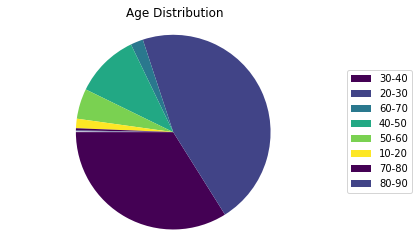

In [38]:
# create pie charts for all properties
lib.create_pie(new_age_distribution, 'Age Distribution')

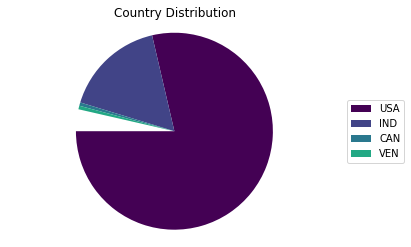

In [34]:
lib.create_pie(new_country_distribution, 'Country Distribution')